In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

from steves_utils.utils_v2 import get_datasets_base_path

In [2]:
bin_path = os.path.join(get_datasets_base_path(), "KRI-16Devices-RawData/14ft/WiFi_air_X310_3123D52_14ft_run1.sigmf-data")
bin_path = os.path.join(get_datasets_base_path(), "KRI-16Devices-RawData/38ft/WiFi_air_X310_3123D52_38ft_run1.sigmf-data")
bin_path = os.path.join(get_datasets_base_path(), "KRI-16Devices-RawData/50ft/WiFi_air_X310_3123D52_50ft_run1.sigmf-data")
bin_path = os.path.join(get_datasets_base_path(), "KRI-16Devices-RawData/20ft/WiFi_air_X310_3123D52_20ft_run1.sigmf-data")
with open(bin_path, "r+") as f:
    x = np.memmap(f, np.complex128)

In [3]:
header_indices_path = "/mnt/wd500GB/CSC500/csc500-main/csc500-dataset-preprocessor/ORACLE_framed/isolate_headers/indices.json"

with open(header_indices_path, "r") as f:
    header_indices = json.load(f)

for naked_path in list(header_indices.keys()):
    full_path = os.path.join(get_datasets_base_path(), naked_path)
    header_indices[full_path] = header_indices[naked_path]
    del header_indices[naked_path]


packet_starts = header_indices[bin_path]
np.random.default_rng(1337).shuffle(packet_starts)

4189086


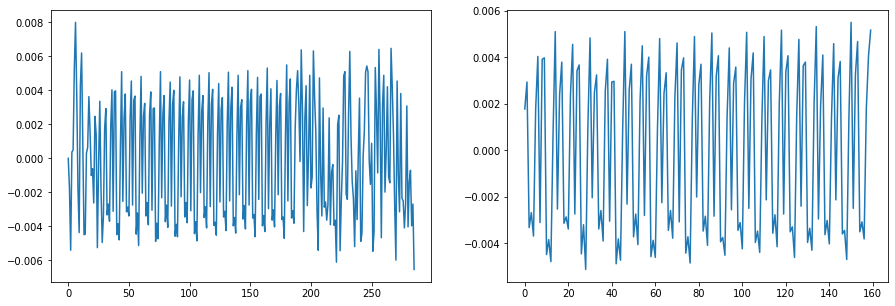

In [5]:
# The SDS way of accessing the data is fine

i = packet_starts[1]
print(i)
old = x[i-30:i+256]
new = x[i:i+160]

plt.figure(figsize=(15,5))

old_ax = plt.subplot(1,2,1)
new_ax  = plt.subplot(1,2,2)

old_ax.plot(range(len(old)), old)
new_ax.plot(range(len(new)), new)